In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Load Data

In [38]:
AAPL_data = pd.read_csv('Data/AAPL.csv')

#### Extract train and test data

We will extract the last month's data as the test data and the rest as the train data

We take the date from 2022-02-24 to 2023-01-31 as the train data and make the test data from 2023-02-01 to 2023-02-23

In [39]:
train_df = AAPL_data[(AAPL_data['Date']>'2022-02-23') & (AAPL_data['Date']<='2023-01-31')]
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760117,141147500
1,2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200
2,2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
3,2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400
4,2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800
...,...,...,...,...,...,...,...
230,2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300
231,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100
232,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70492800
233,2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300


In [40]:
test_df = AAPL_data[(AAPL_data['Date']>'2023-01-31')]
test_df

,Date,Open,High,Low,Close,Adj Close,Volume
235,2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600
236,2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000
237,2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154279900
238,2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300
239,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
240,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
241,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
242,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
243,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
244,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600


In [41]:
def lr(df_train, df_test, colm):
    # calculate the beta values
    x_t = np.array(df_train[colm])
    y_t = np.array(df_train[["Open"]])
    b_t = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_t.T,x_t)),x_t.T),y_t)
    b_t = b_t.tolist()
    b_t = [item for sublist in b_t for item in sublist]
    
    # get the predictions
    x_test = np.array(df_test[colm])
    y_pred = np.matmul(x_test,b_t)
    
    # get the predictions for train data
    x_train = np.array(df_train[colm])
    y_pred_train = np.matmul(x_train,b_t)
    
    # calculate train errors
    train_errors = y_t - y_pred_train 
    return y_pred, train_errors

#### Evaluation

In [42]:
def evaluate(predictions, test_labels):
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#### Without feature selection

In [43]:
y_predict = []
errors = []
for i in range(len(test_df)):
    colm = ['High', 'Low', 'Close', 'Adj Close', 'Volume']
    train_data = train_df.iloc[i:i+231]
    test_data = test_df.iloc[i:i+1]
    y, train_errors = lr(train_data,test_data, colm)
    y_predict.append(y.tolist())
    errors.append(np.mean(train_errors))
    
predict_df = pd.concat([pd.DataFrame(y_predict, columns=['Predict']), test_df[['Open']].reset_index(drop=True)],axis=1)
predict_df.set_index(np.array(AAPL_data[(AAPL_data['Date']>'2023-01-31')].Date),inplace=True)

In [44]:
evaluate(predict_df['Predict'],predict_df['Open'])

Model Performance
Average Error: 0.9552 degrees.
Accuracy = 99.36%.


99.36387415498724

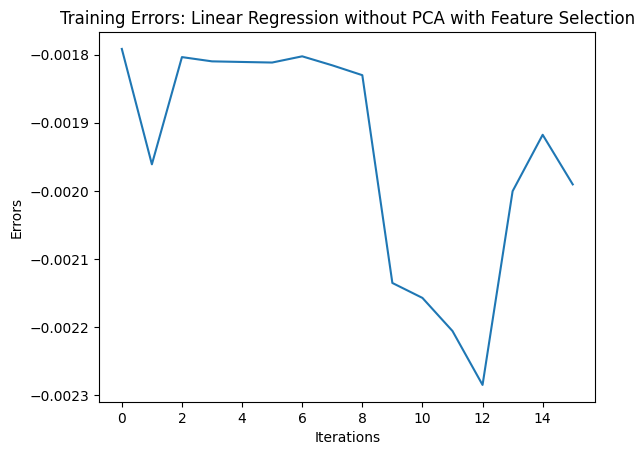

In [45]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Training Errors: Linear Regression without PCA with Feature Selection')
plt.show()

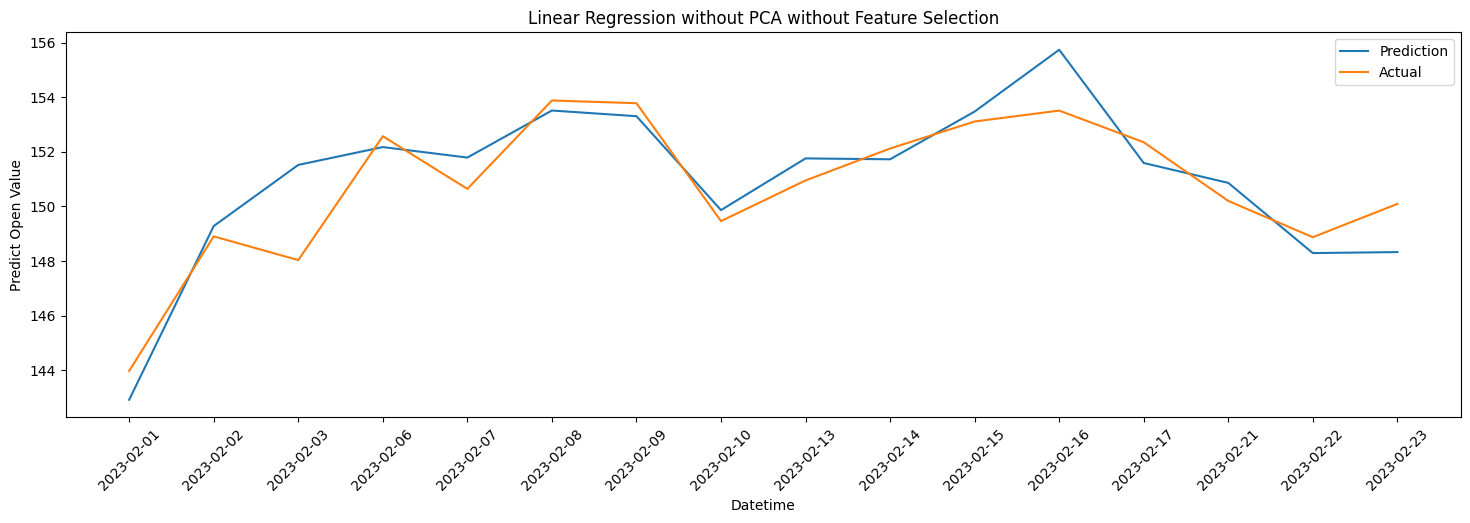

In [46]:
plt.figure(figsize=(18,5))
plt.plot(predict_df['Predict'], label='Prediction')
plt.xticks(rotation=45)
plt.plot(predict_df['Open'], label='Actual')
plt.title('Linear Regression without PCA without Feature Selection')
plt.xlabel('Datetime')
plt.ylabel('Predict Open Value')
plt.legend()
plt.show()

#### With feature selection

In [47]:
y_predict = []
errors = []
for i in range(len(test_df)):
    colm = ['High','Low', 'Close']
    train_data = train_df.iloc[i:i+231]
    test_data = test_df.iloc[i:i+1]
    y, train_errors = lr(train_data,test_data, colm)
    y_predict.append(y.tolist())
    errors.append(np.mean(train_errors))
    
predict_df = pd.concat([pd.DataFrame(y_predict, columns=['Predict']), test_df[['Open']].reset_index(drop=True)],axis=1)
predict_df.set_index(np.array(AAPL_data[(AAPL_data['Date']>'2023-01-31')].Date),inplace=True)

In [48]:
evaluate(predict_df['Predict'],predict_df['Open'])

Model Performance
Average Error: 0.8990 degrees.
Accuracy = 99.40%.


99.40144556265584

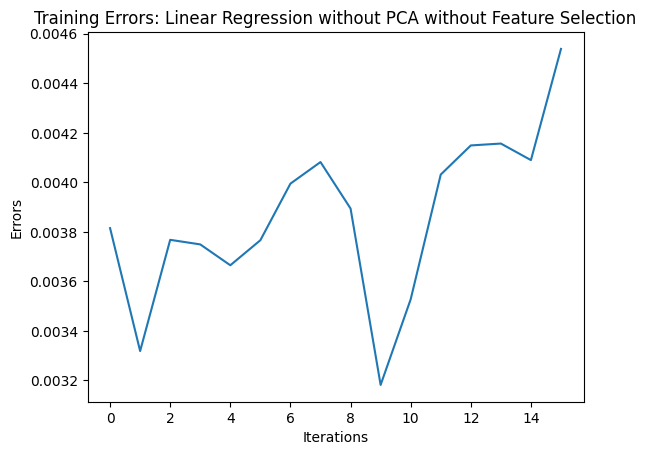

In [49]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Training Errors: Linear Regression without PCA without Feature Selection')
plt.show()

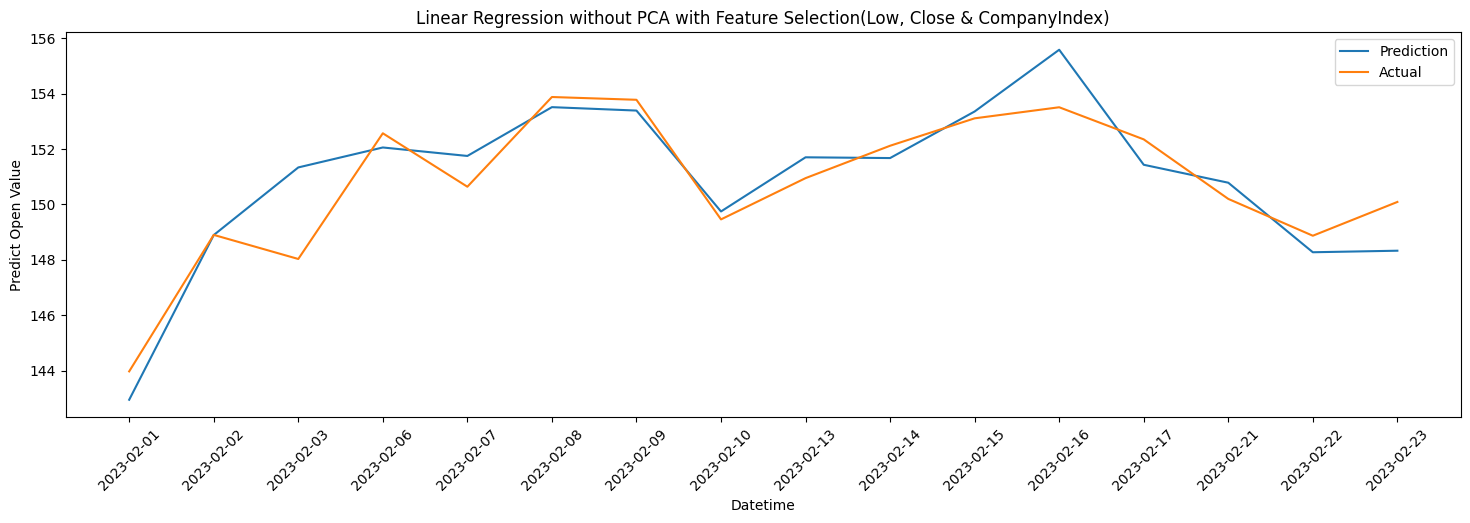

In [50]:
plt.figure(figsize=(18,5))
plt.plot(predict_df['Predict'], label='Prediction')
plt.xticks(rotation=45)
plt.plot(predict_df['Open'], label='Actual')
plt.title('Linear Regression without PCA with Feature Selection(Low, Close & CompanyIndex)')
plt.xlabel('Datetime')
plt.ylabel('Predict Open Value')
plt.legend()
plt.show()